<a href="https://colab.research.google.com/github/ELVAN13091999/my-first-binder/blob/main/Basic_actuarial_calculations_in_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic actuarial calculations in insurance¶
Personal Project By Elvan Vensiando

Special thanks to IBM Corporation and MIT for providing free online courses in cognitiveclass.ai

Special thanks to Bogdan Norkin for explanation in basic insurance.

-> Let's make numerical experiment

We consider risk process with INITIAL_CAPITAL, with premium arrival at a constant INCOME_INTENSITY rate, claims are independent and identically distributed non-negative random variables (here we consider exponentially distributed claim size with positive CLAIM_MEAN) and arrive according to a Poisson process with INCOME_INTENSITY rate.

In [1]:
MAXTIME = 10000          # simulation period
INCOME_INTENSITY = 1  # income intensity per time unit
CLAIM_INTENSITY = 1   # time between claims is exponentially distributed 
CLAIM_MEAN = 0.8        # claims are exponentially distributed with CLAIM MEAN, should be >0
TRAJEC_NUM = 100     # number of trajectories simulated

-> Let's make theoretical calculations
Let's define riskprocess_theo(seed_capital) function of the seed (initial) capital that will return [RuinProbability, MeanValue] values for an infinite time interval.

In [2]:
from math import exp #Importing exp function
def riskprocess_theo(seed_capital): #As an initial capital function 
  Ro=(INCOME_INTENSITY)/(CLAIM_INTENSITY*CLAIM_MEAN)-1
  if (Ro>0):
    RuinProb_Theo=exp(-Ro*seed_capital/((Ro+1)*CLAIM_INTENSITY))/(Ro+1) #Calculating Ruin Probability on infinite time interval
  else:RuinProb_Theo=1
  Mean_Theo=(1-RuinProb_Theo)*(seed_capital+(INCOME_INTENSITY-CLAIM_INTENSITY*CLAIM_MEAN)*MAXTIME) #Calculating Mean
  return [RuinProb_Theo,Mean_Theo] 

-> Let's develop numerical experiment by monte carlo simulation based on classical risk process where the flow of claims in Poisson process

In [3]:
import random
import time
from operator import add
def riskprocess(seed_capital): #initial capital as parameter 
  RuinProb_MC = 0
  Mean_MC = 0
  i=0
  for i in range(TRAJEC_NUM):
    time = 0
    capital=seed_capital
    while (time < MAXTIME)and(capital>=0):
      time_step=random.expovariate(CLAIM_INTENSITY)
      time+=time_step
      capital += INCOME_INTENSITY * time_step - random.expovariate(1/CLAIM_MEAN)
    if (capital<0): #in case of ruin
      RuinProb_MC+=1/TRAJEC_NUM 
    else: 
      Mean_MC+=capital/TRAJEC_NUM # we add obtained capital if we do not ruin
  return [RuinProb_MC,Mean_MC]

-> Now we can test our functions.

In [9]:
[RuinProbMC,MeanMC]=riskprocess(10)
print(" Results for MonteCarlo. Mean capital earned =",MeanMC,"Ruin Probability =", RuinProbMC)

 Results for MonteCarlo. Mean capital earned = 1880.9263583729432 Ruin Probability = 0.060000000000000005


In [10]:
[RuinProb_Theo,Mean_Theo]=riskprocess_theo(10)
print("Theoretical results Mean Value =",Mean_Theo,"Ruin Probability (infinite time) =",RuinProb_Theo)

Theoretical results Mean Value = 1792.3808645555264 Ruin Probability (infinite time) = 0.10826822658929017


-> Now let's build the plot of Ruin Probability as a function of an initial capital. To do this, we have to generate an array of seed capital values and apply our function.

In [11]:
import numpy as np
seed_capital_array = np.arange(0, 20, 2).tolist() # Generating Seed Capital array
[RuinProbMCarray,MeanMCarray]=np.array([riskprocess(u) for u in seed_capital_array]).transpose() # Starting Monte Carlo simulation for each Seed Capital value
[RuinProbTheoarray,MeanTheoarray]=np.array([riskprocess_theo(u) for u in seed_capital_array]).transpose() # Applying theoretical fourmulas for each Seed Capital value

-> Now lets plot theoretical vs numerical results.

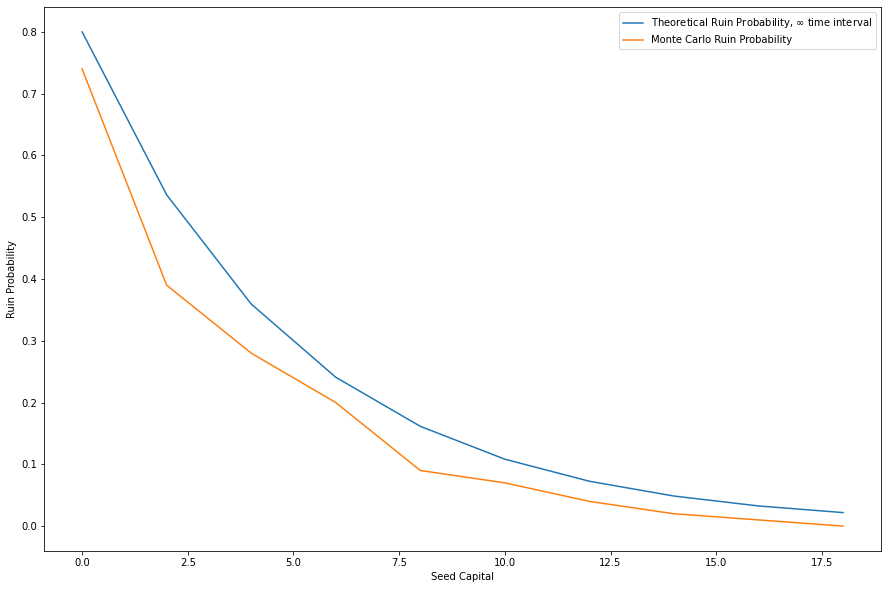

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(seed_capital_array, RuinProbTheoarray, label = 'Theoretical Ruin Probability, $\infty $ time interval')
ax.plot(seed_capital_array, RuinProbMCarray, label = 'Monte Carlo Ruin Probability')
ax.set_ylabel('Ruin Probability')
ax.set_xlabel('Seed Capital')
ax.legend()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

Theoretical Ruin Probability is calculated for an infinite time interval so it can be considered as an upper bound. Also the accuracy depends on the number of the trajectories (TRAJEC_NUM) of Monte Carlo method.

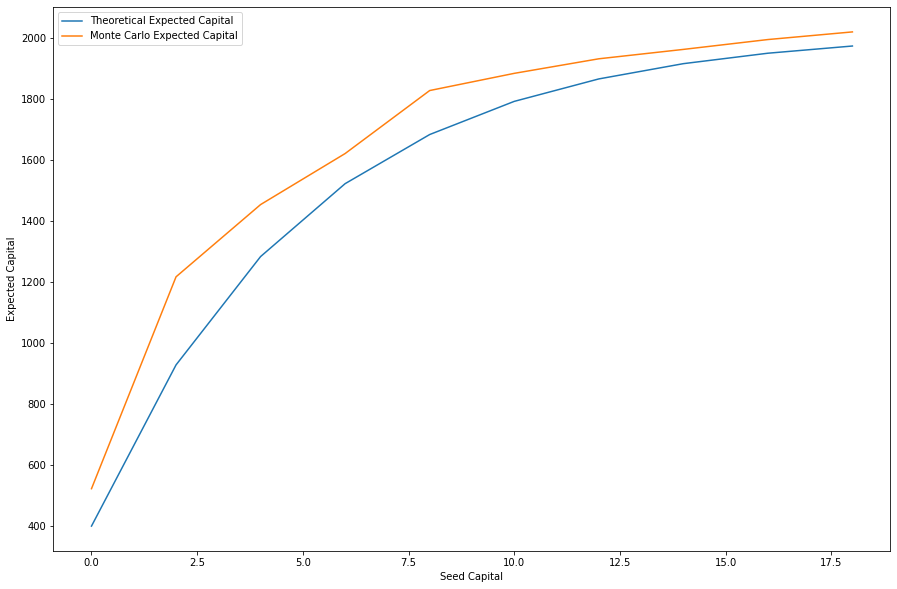

In [13]:
fig, ax = plt.subplots()
ax.plot(seed_capital_array, MeanTheoarray, label = 'Theoretical Expected Capital')
ax.plot(seed_capital_array, MeanMCarray, label = 'Monte Carlo Expected Capital')
ax.set_ylabel('Expected Capital')
ax.set_xlabel('Seed Capital')
ax.legend()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

Conclusion: Numerical Monte Carlo is best approximation for classical process in predicting ruin probability, that the accuracy we can improve by increasing the number of trajectory